<a href="https://colab.research.google.com/github/AditiSingh006/dog_vs_cat_classifier/blob/main/cat_dog_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installing Dataset

In [ ]:
!pip install opendatasets
!pip install pandas

In [ ]:
import opendatasets as od
import pandas

od.download(
    "https://www.kaggle.com/datasets/tongpython/cat-and-dog")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: aditisingh06
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog


100%|██████████| 218M/218M [00:01<00:00, 176MB/s]


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

keras.utils.image_dataset_from_directory function from keras: https://keras.io/api/data_loading/image/

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/cat-and-dog/training_set/training_set',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 8005 files belonging to 2 classes.


In [ ]:
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/cat-and-dog/test_set/test_set',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 2023 files belonging to 2 classes.


The data is stored in numpy array with values from 0 to 255. We need to nomalize it from 0 to 1.

In [ ]:
def process(image, label):
  image=tf.cast(image/255, tf.float32)
  return image, label

In [ ]:
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

#Model

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding = 'valid', activation = 'relu', input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Training

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 1795s 7s/step - accuracy: 0.5584 - loss: 3.3897 - val_accuracy: 0.4923 - val_loss: 0.8012
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 1809s 7s/step - accuracy: 0.6244 - loss: 0.7121 - val_accuracy: 0.6258 - val_loss: 0.6555
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 1763s 7s/step - accuracy: 0.6867 - loss: 0.5859 - val_accuracy: 0.6401 - val_loss: 1.0822
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 1767s 7s/step - accuracy: 0.7064 - loss: 0.5853 - val_accuracy: 0.7143 - val_loss: 0.5493
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 1774s 7s/step - accuracy: 0.7612 - loss: 0.4889 - val_accuracy: 0.7469 - val_loss: 0.5285
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 1803s 7s/step - accuracy: 0.8037 - loss: 0.4321 - val_accuracy: 0.7598 - val_loss: 0.4956
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 1756s 7s/step - accuracy: 0.8385 - loss: 0.3646 - val_accuracy: 0.7217 - val_loss: 0.5730
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 1768s 7s/step - accuracy: 0.8395 - loss: 0.3752 - 

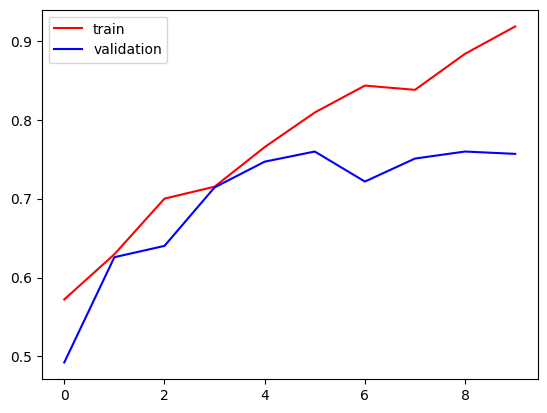

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

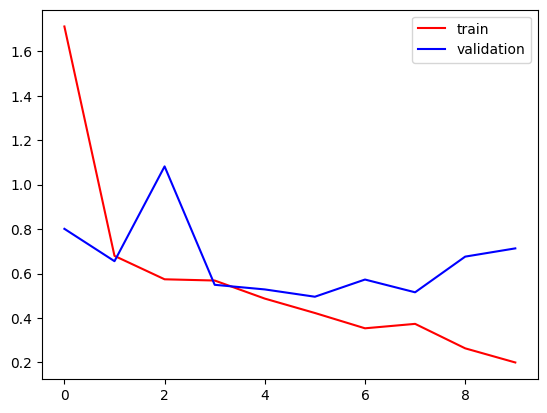

In [ ]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

#Testing

Predict cat

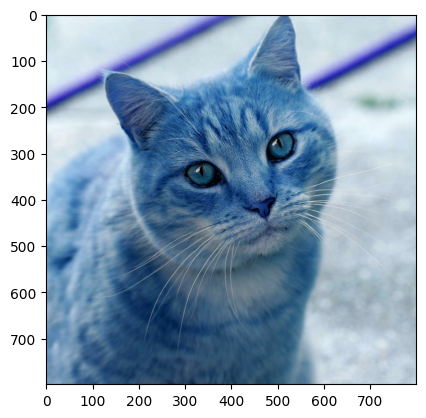

In [ ]:
import cv2
test_img = cv2.imread('/content/cat.jpg')
plt.imshow(test_img)

In [ ]:
test_img.shape

(256, 256, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


array([[0.]], dtype=float32)

Predict dog

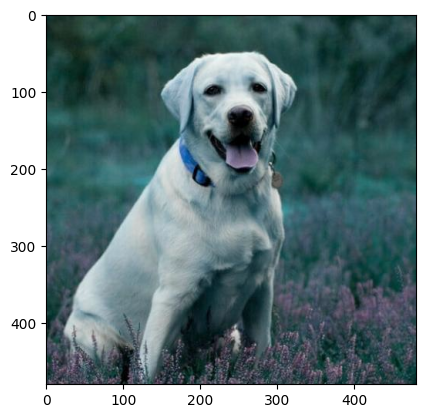

In [ ]:
import cv2
test_img = cv2.imread('/content/dog.jpg')
plt.imshow(test_img)

In [ ]:
test_img.shape

(480, 480, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


array([[1.]], dtype=float32)